In [93]:
import pandas as pd

In [94]:
df = pd.read_parquet(r"compressed_aviation_traffic_data.parquet")
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,arrival_country,arrival_continent,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,MP,OC,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,MP,OC,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,US,OC,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,US,OC,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,US,OC,879296.0,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293833,TTL,None,None,None,ANAC,0.0,NaN,VIX,VIX,-40.285000,...,BR,SA,0.0,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1
293834,None,None,None,None,AUS Stats,0.0,NaN,MEL,ASP,144.843002,...,AU,OC,0.0,1857.153168,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1
293835,None,None,None,None,AUS Stats,0.0,NaN,SYD,ASP,151.177002,...,AU,OC,0.0,2020.723001,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1
293836,None,None,None,None,AUS Stats,0.0,NaN,MOV,BNE,148.076996,...,AU,OC,0.0,779.613350,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1


In [ ]:
df["arrival_continent"].replace("")

In [65]:
df.departure_continent.value_counts()

departure_continent
NA    127711
EU    105514
AS     37893
AF     10754
SA      7828
OC      4121
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293838 entries, 0 to 293837
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   airline_iata          260430 non-null  object 
 1   acft_icao             254406 non-null  object 
 2   acft_class            254406 non-null  object 
 3   seymour_proxy         254406 non-null  object 
 4   source                293838 non-null  object 
 5   seats                 293838 non-null  float64
 6   n_flights             254406 non-null  float64
 7   iata_departure        293838 non-null  object 
 8   iata_arrival          293838 non-null  object 
 9   departure_lon         293821 non-null  float64
 10  departure_lat         293821 non-null  float64
 11  departure_country     293787 non-null  object 
 12  departure_continent   293821 non-null  object 
 13  arrival_lon           293821 non-null  float64
 14  arrival_lat           293821 non-null  float64
 15  

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

Missing values

In [69]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_summary / len(df) * 100).round(2)
missing_df = pd.DataFrame(
    {"Missing Values": missing_summary, "Percent Missing": missing_percentage}
)
missing_df

,Missing Values,Percent Missing
fuel_burn_seymour,42394,14.43
acft_class,39432,13.42
seymour_proxy,39432,13.42
n_flights,39432,13.42
acft_icao,39432,13.42
airline_iata,33408,11.37
departure_country,51,0.02
arrival_country,51,0.02
arrival_continent,17,0.01
arrival_lat,17,0.01


In [70]:
missing_df

,Missing Values,Percent Missing
fuel_burn_seymour,42394,14.43
acft_class,39432,13.42
seymour_proxy,39432,13.42
n_flights,39432,13.42
acft_icao,39432,13.42
airline_iata,33408,11.37
departure_country,51,0.02
arrival_country,51,0.02
arrival_continent,17,0.01
arrival_lat,17,0.01


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Plot distribution of CO2 emissions

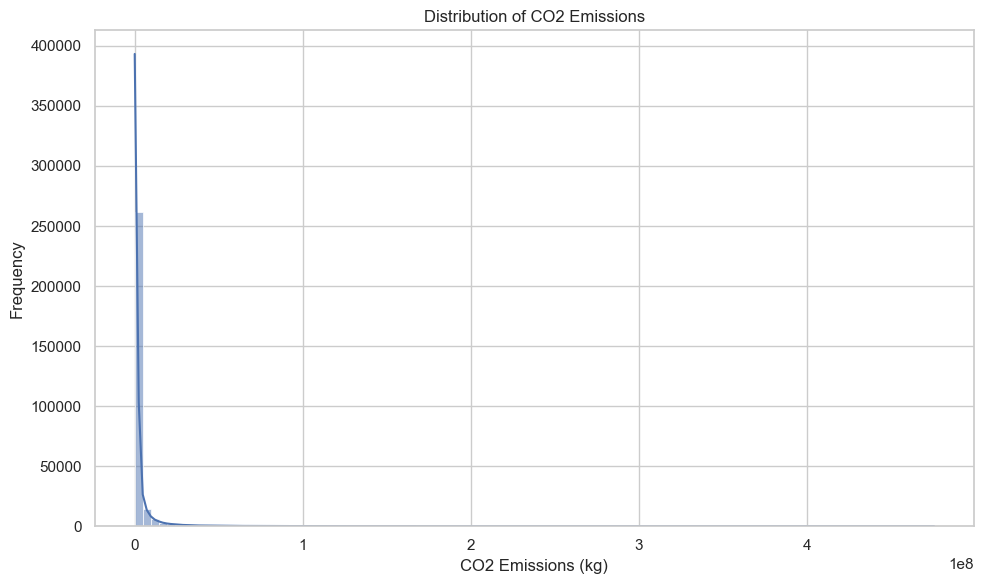

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df["co2"], bins=100, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Let's log transform the CO2 emissions and see the plot again

c:\Users\Afag\miniforge3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


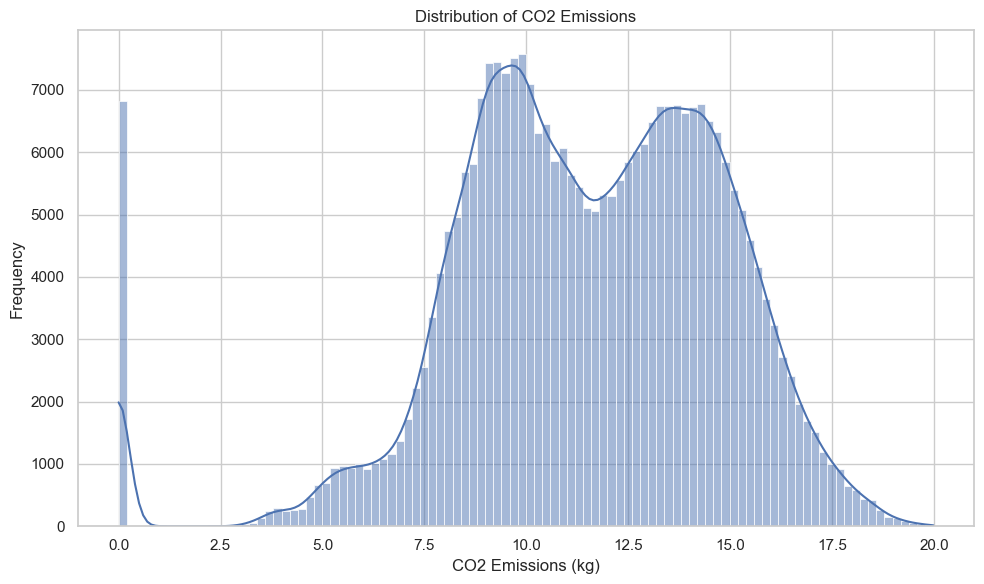

In [73]:
import numpy as np

df["log_co2"] = np.log1p(df["co2"])
plt.figure(figsize=(10, 6))
sns.histplot(df["log_co2"], bins=100, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Plot distribution of distance

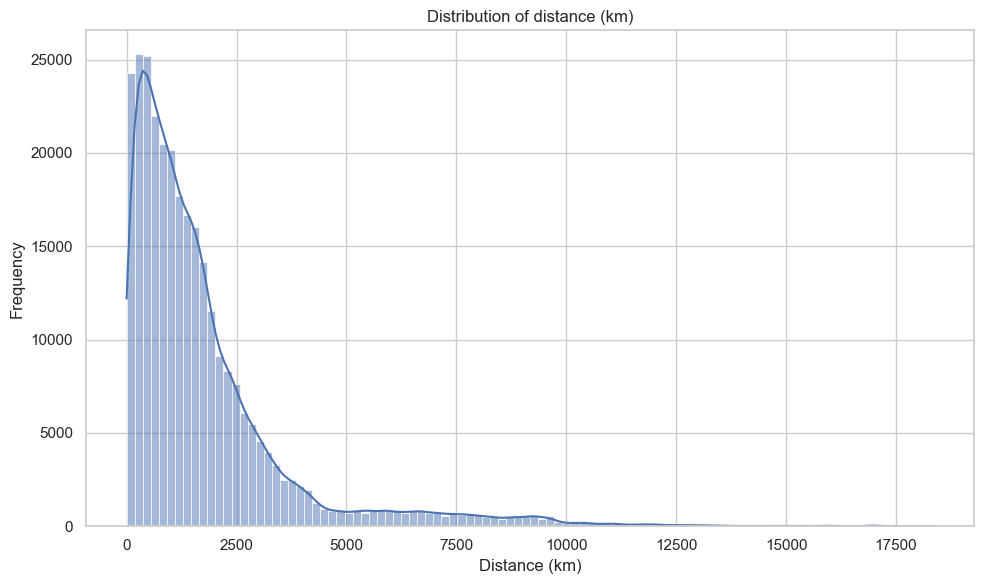

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df["distance_km"], bins=100, kde=True)
plt.title("Distribution of distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Here we can see the distribution of distance is not normal. and concentrated on 0s. Should figure that out. We can try to log transform the distance and see if it helps.

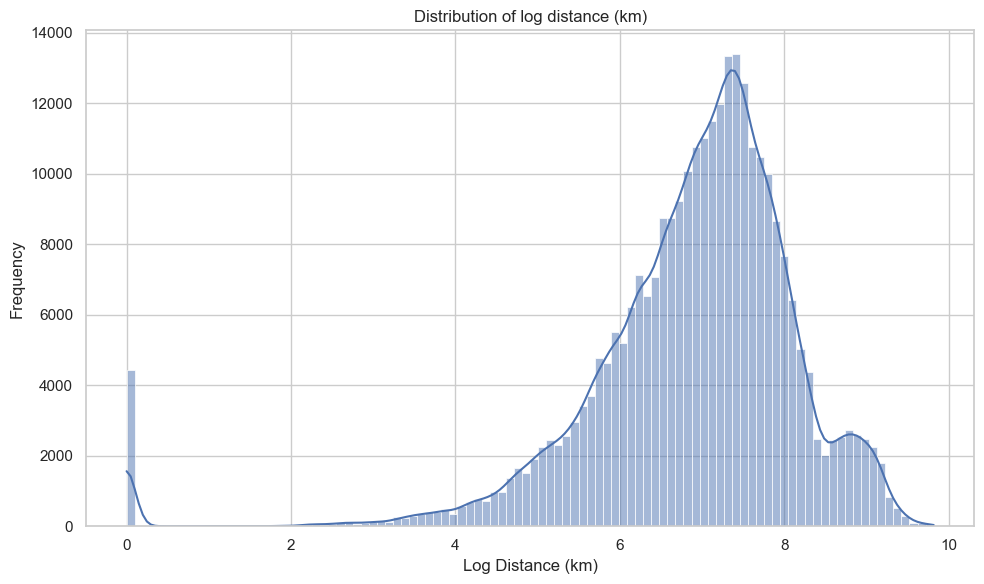

In [75]:
df["log_distance"] = np.log1p(df["distance_km"])
plt.figure(figsize=(10, 6))
sns.histplot(df["log_distance"], bins=100, kde=True)
plt.title("Distribution of log distance (km)")
plt.xlabel("Log Distance (km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [76]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [77]:
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,879296.0,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293833,TTL,None,None,None,ANAC,0.0,NaN,VIX,VIX,-40.285000,...,0.0,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,0.000000
293834,None,None,None,None,AUS Stats,0.0,NaN,MEL,ASP,144.843002,...,0.0,1857.153168,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,7.527338
293835,None,None,None,None,AUS Stats,0.0,NaN,SYD,ASP,151.177002,...,0.0,2020.723001,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,7.611705
293836,None,None,None,None,AUS Stats,0.0,NaN,MOV,BNE,148.076996,...,0.0,779.613350,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,6.660080


In [78]:
df.columns

Index(['airline_iata', 'acft_icao', 'acft_class', 'seymour_proxy', 'source',
       'seats', 'n_flights', 'iata_departure', 'iata_arrival', 'departure_lon',
       'departure_lat', 'departure_country', 'departure_continent',
       'arrival_lon', 'arrival_lat', 'arrival_country', 'arrival_continent',
       'seats_no_est_scaling', 'distance_km', 'ask', 'rpk',
       'fuel_burn_seymour', 'fuel_burn', 'co2', 'domestic', 'log_co2',
       'log_distance'],
      dtype='object')

In [79]:
def distance_cumul_plot_flights(flights_df):
    fig = go.Figure()

    # Define bins for a quick cumulative distribution rendering. 10 km
    bins = list(range(0, int(flights_df["distance_km"].max()) + 10, 10))

    # Cumulative distributions for each metric
    # Seats
    hist_seats, edges_seats = (
        flights_df["seats"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_seats = hist_seats.cumsum() / hist_seats.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_seats,
            y=hist_cumul_seats,
            mode="lines",
            name="Seats",
            line=dict(color="#1f77b4", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    # ASK
    hist_ask, edges_ask = (
        flights_df["ask"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_ask = hist_ask.cumsum() / hist_ask.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_ask,
            y=hist_cumul_ask,
            mode="lines",
            name="ASK",
            line=dict(color="#ff7f0e", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    #  CO2
    hist_co2, edges_co2 = (
        flights_df["co2"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_co2 = hist_co2.cumsum() / hist_co2.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_co2,
            y=hist_cumul_co2,
            mode="lines",
            name="CO2 (kg)",
            line=dict(color="#2ca02c", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    # Formatting
    fig.update_layout(
        title="Metrics cumulative distribution vs flight distance",
        xaxis_title="Distance (km)",
        yaxis_title="Cumulative distribution (%)",
        template="plotly_white",
        hovermode="x",
        margin=dict(l=60, r=60, t=60, b=60),
        legend=dict(
            x=0.82,
            y=0.08,
            bgcolor="rgba(255, 255, 255, 0.5)",
        ),
    )

    return fig

In [80]:
distance_cumul_plot_flights(df)

C:\Users\Afag\AppData\Local\Temp\ipykernel_9272\3427151817.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Afag\AppData\Local\Temp\ipykernel_9272\3427151817.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Afag\AppData\Local\Temp\ipykernel_9272\3427151817.py:44: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



1. Seats
Shows that most seating capacity is deployed on flights shorter than 5,000 km. (cumulative 90% of all seats)

This includes short and medium routes
2. ASK (~65.2% under 4890 km)
Indicates that ~65% of available seat kilometers (a proxy for supply) also comes from shorter flights.

Suggests that shorter flights dominate volume, though not in direct proportion to seats (because distance matters in ASK).

3. CO₂ (~64.9% under 4890 km)
CO₂ emissions track ASK closely — again, showing that shorter flights contribute significantly to total emissions.

However, there's a divergence from seats, meaning short flights emit more per seat compared to long-haul flights.

### Plot CO2 vs Distance

In [16]:
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,879296.0,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293833,TTL,None,None,None,ANAC,0.0,NaN,VIX,VIX,-40.285000,...,0.0,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,0.000000
293834,None,None,None,None,AUS Stats,0.0,NaN,MEL,ASP,144.843002,...,0.0,1857.153168,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,7.527338
293835,None,None,None,None,AUS Stats,0.0,NaN,SYD,ASP,151.177002,...,0.0,2020.723001,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,7.611705
293836,None,None,None,None,AUS Stats,0.0,NaN,MOV,BNE,148.076996,...,0.0,779.613350,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1,0.000000,6.660080


In [81]:
filtered = df[(df["co2"] > 0) & (df["distance_km"] > 0)]

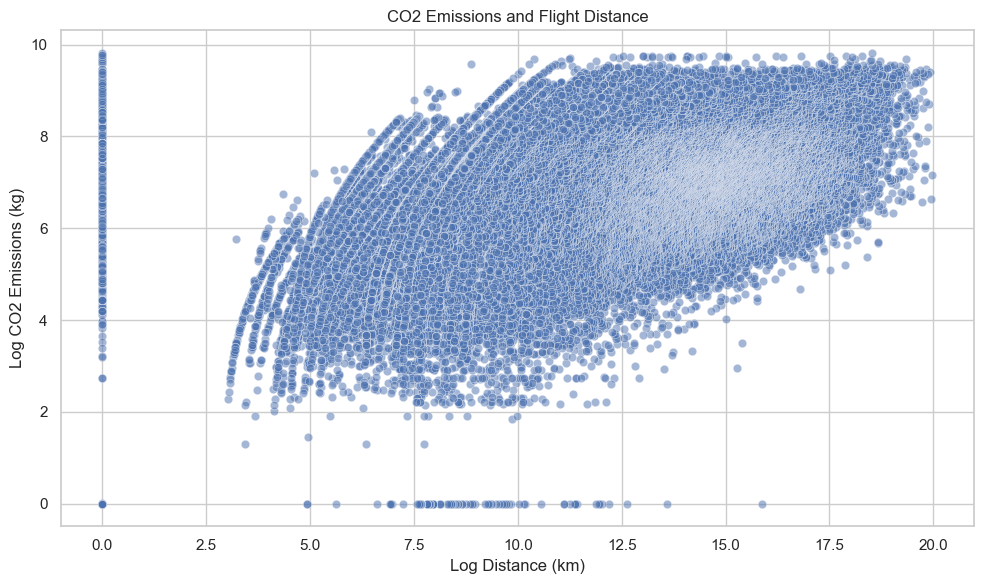

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="log_co2", y="log_distance", alpha=0.3)
plt.title("CO2 Emissions and Flight Distance")
plt.xlabel("Log Distance (km)")
plt.ylabel("Log CO2 Emissions (kg)")
plt.tight_layout()
plt.show()

Clear positive correlation longer flights more CO₂ emissions.

Non linear pattern: some medium distances have large emissions

### Plot CO2 vs Seats

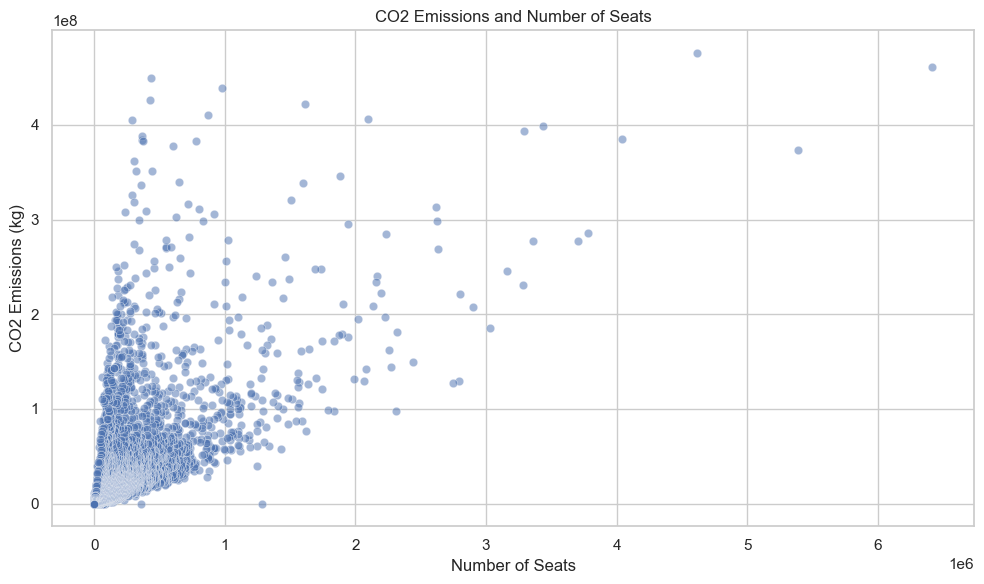

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="seats", y="co2", alpha=0.3)
plt.title("CO2 Emissions and Number of Seats")
plt.xlabel("Number of Seats")
plt.ylabel("CO2 Emissions (kg)")
plt.tight_layout()
plt.show()

More seats generally mean more emissions but with large variability


### Boxplot: CO2 by Aircraft Class

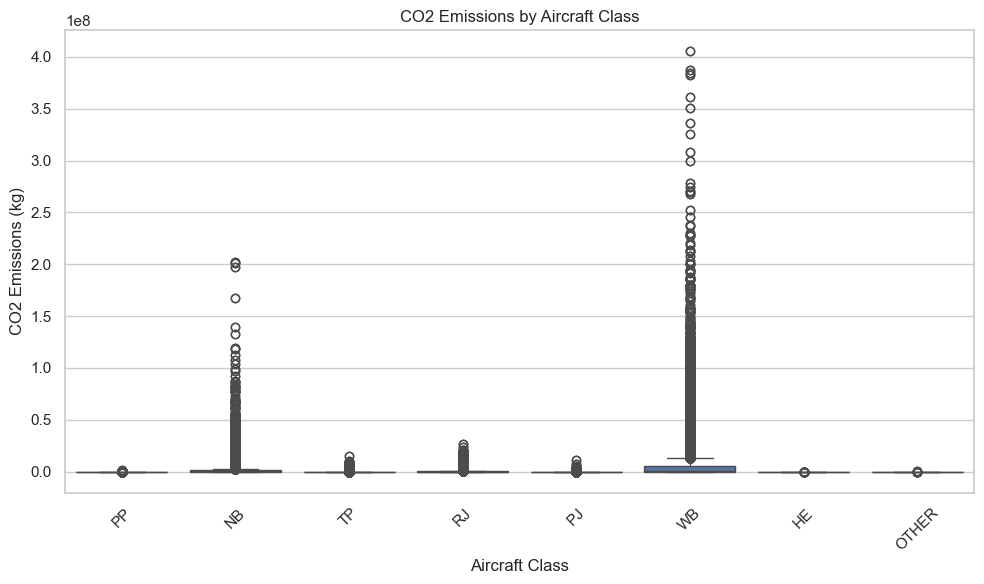

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="acft_class", y="co2")
plt.title("CO2 Emissions by Aircraft Class")
plt.xlabel("Aircraft Class")
plt.ylabel("CO2 Emissions (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Wide-body aircraft emit the most on average. Extreme outliers are present in this category.

- Narrow-body  and Regional Jets  follow in the same pattern but with less emissions.

- Private Jets and Piston Propeller aircraft have much lower emissions

### Correlation matrix for CO2 emissions


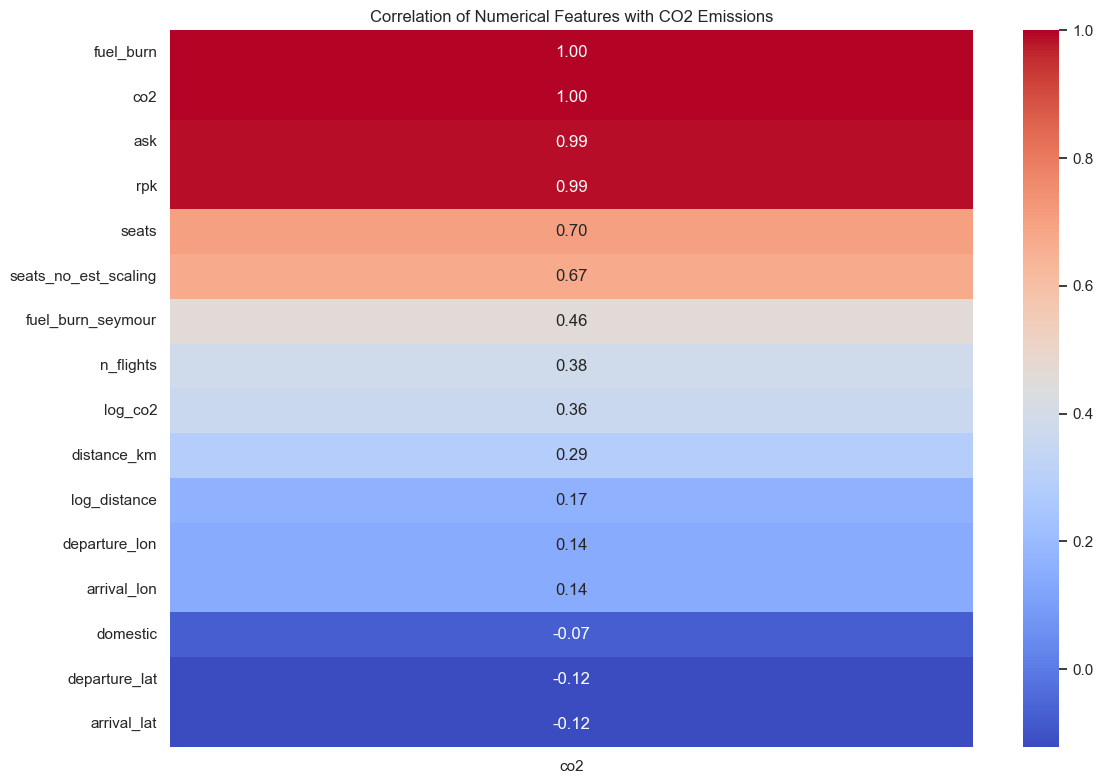

,seats,n_flights,departure_lon,departure_lat,arrival_lon,arrival_lat,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
fuel_burn,0.698647,0.383121,0.141656,-0.121361,0.141656,-0.121361,0.669724,0.288409,0.989839,0.989839,0.458195,1.000000,1.000000,-0.073736,0.360979,0.170531
co2,0.698647,0.383121,0.141656,-0.121361,0.141656,-0.121361,0.669724,0.288409,0.989839,0.989839,0.458195,1.000000,1.000000,-0.073736,0.360979,0.170531
ask,0.677800,0.382350,0.142880,-0.119611,0.142880,-0.119611,0.664277,0.295759,1.000000,1.000000,0.454397,0.989839,0.989839,-0.083095,0.364225,0.182478
rpk,0.677800,0.382350,0.142880,-0.119611,0.142880,-0.119611,0.664277,0.295759,1.000000,1.000000,0.454397,0.989839,0.989839,-0.083095,0.364225,0.182478
seats,1.000000,0.878292,0.157964,-0.121278,0.157964,-0.121278,0.812046,0.020887,0.677800,0.677800,0.124120,0.698647,0.698647,0.024945,0.340618,0.042354
seats_no_est_scaling,0.812046,0.878292,0.143870,-0.119855,0.143870,-0.119855,1.000000,0.049858,0.664277,0.664277,0.124120,0.669724,0.669724,-0.020695,0.382098,0.064149
fuel_burn_seymour,0.124120,-0.003615,0.192274,-0.192900,0.192274,-0.192900,0.124120,0.868992,0.454397,0.454397,1.000000,0.458195,0.458195,-0.315112,0.347514,0.499923
n_flights,0.878292,1.000000,-0.015258,-0.020127,-0.015258,-0.020127,0.878292,-0.027572,0.382350,0.382350,-0.003615,0.383121,0.383121,0.047931,0.447126,0.003219
log_co2,0.340618,0.447126,0.354611,-0.061836,0.354611,-0.061836,0.382098,0.326463,0.364225,0.364225,0.347514,0.360979,0.360979,-0.294521,1.000000,0.552529
distance_km,0.020887,-0.027572,0.139637,-0.130324,0.139637,-0.130324,0.049858,1.000000,0.295759,0.295759,0.868992,0.288409,0.288409,-0.410695,0.326463,0.688722


In [85]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["co2"]].sort_values(by="co2", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation of Numerical Features with CO2 Emissions")
plt.tight_layout()
plt.show()

correlation_matrix_sorted = correlation_matrix.sort_values(by="co2", ascending=False)
correlation_matrix_sorted

### Correlation matrix for Log CO2 emissions

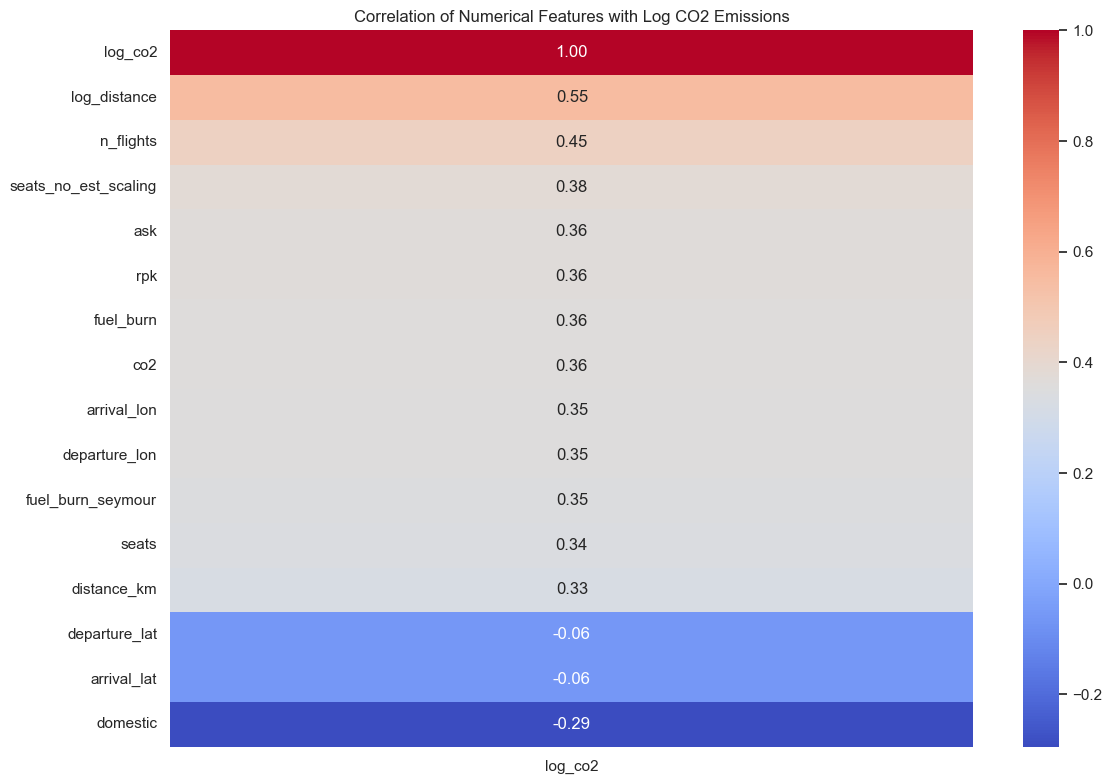

,seats,n_flights,departure_lon,departure_lat,arrival_lon,arrival_lat,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
log_co2,0.340618,0.447126,0.354611,-0.061836,0.354611,-0.061836,0.382098,0.326463,0.364225,0.364225,0.347514,0.360979,0.360979,-0.294521,1.000000,0.552529
log_distance,0.042354,0.003219,0.127912,-0.068702,0.127912,-0.068702,0.064149,0.688722,0.182478,0.182478,0.499923,0.170531,0.170531,-0.435180,0.552529,1.000000
n_flights,0.878292,1.000000,-0.015258,-0.020127,-0.015258,-0.020127,0.878292,-0.027572,0.382350,0.382350,-0.003615,0.383121,0.383121,0.047931,0.447126,0.003219
seats_no_est_scaling,0.812046,0.878292,0.143870,-0.119855,0.143870,-0.119855,1.000000,0.049858,0.664277,0.664277,0.124120,0.669724,0.669724,-0.020695,0.382098,0.064149
ask,0.677800,0.382350,0.142880,-0.119611,0.142880,-0.119611,0.664277,0.295759,1.000000,1.000000,0.454397,0.989839,0.989839,-0.083095,0.364225,0.182478
rpk,0.677800,0.382350,0.142880,-0.119611,0.142880,-0.119611,0.664277,0.295759,1.000000,1.000000,0.454397,0.989839,0.989839,-0.083095,0.364225,0.182478
fuel_burn,0.698647,0.383121,0.141656,-0.121361,0.141656,-0.121361,0.669724,0.288409,0.989839,0.989839,0.458195,1.000000,1.000000,-0.073736,0.360979,0.170531
co2,0.698647,0.383121,0.141656,-0.121361,0.141656,-0.121361,0.669724,0.288409,0.989839,0.989839,0.458195,1.000000,1.000000,-0.073736,0.360979,0.170531
arrival_lon,0.157964,-0.015258,0.898307,-0.139147,1.000000,-0.156640,0.143870,0.139637,0.142880,0.142880,0.192274,0.141656,0.141656,-0.407004,0.354611,0.127912
departure_lon,0.157964,-0.015258,1.000000,-0.156640,0.898307,-0.139147,0.143870,0.139637,0.142880,0.142880,0.192274,0.141656,0.141656,-0.407004,0.354611,0.127912


In [86]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["log_co2"]].sort_values(by="log_co2", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation of Numerical Features with Log CO2 Emissions")
plt.tight_layout()
plt.show()

correlation_matrix_sorted = correlation_matrix.sort_values(
    by="log_co2", ascending=False
)
correlation_matrix_sorted

In [23]:
numeric_cols = [
    "seats",
    "n_flights",
    "seats_no_est_scaling",
    "distance_km",
    "log_distance",
    "ask",
    "rpk",
    "fuel_burn_seymour",
    "fuel_burn",
    "co2",
    "log_co2",
]

numeric_data = df[numeric_cols]

missing_summary = numeric_data.isnull().sum().sort_values(ascending=False)

outlier_info = {}
for col in numeric_cols:
    if col in numeric_data.columns:
        q1 = numeric_data[col].quantile(0.25)
        q3 = numeric_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = (
            (numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)
        ).sum()
        outlier_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "n_outliers": outliers,
        }

outliers_df = pd.DataFrame(outlier_info).T.sort_values(by="n_outliers", ascending=False)
outliers_df

,lower_bound,upper_bound,n_outliers
ask,-2.184602e+07,3.665001e+07,44396.0
rpk,-1.800112e+07,3.019961e+07,44396.0
fuel_burn,-5.722342e+05,9.630407e+05,43932.0
co2,-1.808260e+06,3.043208e+06,43932.0
seats,-1.615682e+04,2.722536e+04,43378.0
seats_no_est_scaling,-1.541146e+04,2.598310e+04,42168.0
n_flights,-7.175000e+01,1.222500e+02,38838.0
fuel_burn_seymour,-6.595272e+03,1.643532e+04,21512.0
distance_km,-1.890657e+03,4.597910e+03,20826.0
log_distance,4.224583e+00,9.754047e+00,9508.0


In [ ]:
outliers_df

,lower_bound,upper_bound,n_outliers
ask,-2.184602e+07,3.665001e+07,44396.0
rpk,-1.800112e+07,3.019961e+07,44396.0
fuel_burn,-5.722342e+05,9.630407e+05,43932.0
co2,-1.808260e+06,3.043208e+06,43932.0
seats,-1.615682e+04,2.722536e+04,43378.0
seats_no_est_scaling,-1.541146e+04,2.598310e+04,42168.0
n_flights,-7.175000e+01,1.222500e+02,38838.0
fuel_burn_seymour,-6.595272e+03,1.643532e+04,21512.0
distance_km,-1.890657e+03,4.597910e+03,20826.0
log_distance,4.224583e+00,9.754047e+00,9508.0


### Capping them with 99 percentile.


In [27]:
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

Capping values for whole data: 
- **Lower Upper Column**
- 0.0 266362.1484 *seats*
- 0.5 1047.0 *n_flights*
- 0.0 205793.0 *seats_no_est_scaling*
- 0.0 9487.429969576144 *distance_km*
- 0.0 9.157828437408874 *log_distance*
- 0.0 661030796.2811933 *ask*
- 0.0 544689376.1357032 *rpk*
- 0.0 75479.37857206319 *fuel_burn_seymour*
- 0.0 16210973.498874782 *fuel_burn*
- 0.0 51226676.25644431 *co2*
- 0.0 17.75177099448037 *log_co2*

### Fill mising with median

In [28]:
df[numeric_cols] = numeric_data.fillna(numeric_data.median())
df[numeric_cols].isnull().sum()

seats                   0
n_flights               0
seats_no_est_scaling    0
distance_km             0
log_distance            0
ask                     0
rpk                     0
fuel_burn_seymour       0
fuel_burn               0
co2                     0
log_co2                 0
dtype: int64

In [29]:
df.isnull().sum().sort_values(ascending=False)

arrival_continent       127728
departure_continent     127728
acft_class               39432
seymour_proxy            39432
acft_icao                39432
airline_iata             33408
arrival_country             51
departure_country           51
departure_lat               17
arrival_lat                 17
arrival_lon                 17
departure_lon               17
iata_arrival                 0
iata_departure               0
n_flights                    0
seats                        0
source                       0
seats_no_est_scaling         0
distance_km                  0
ask                          0
rpk                          0
fuel_burn_seymour            0
fuel_burn                    0
co2                          0
domestic                     0
log_co2                      0
log_distance                 0
dtype: int64

### Identify columns where negative or zero values should not logically exist


In [30]:
df.shape

(293838, 27)

In [31]:
positive_only_cols = [
    "distance_km",
    "co2",
    "fuel_burn",
    "ask",
    "rpk",
    "seats",
    "seats_no_est_scaling",
]

invalid_counts = {
    col: {"negative_values": (df[col] < 0).sum(), "zero_values": (df[col] == 0).sum()}
    for col in positive_only_cols
}

invalid_df = pd.DataFrame(invalid_counts).T

for col in positive_only_cols:
    df = df[(df[col] > 0)]

df["log_co2"] = np.log1p(df["co2"])
df["log_distance"] = np.log1p(df["distance_km"])

df.shape[0]

286076

### Impute categorical variables

We can use countries to fill the continent missing values. 

In [32]:
continent_missing = df[
    (df["departure_continent"].isna()) & (df["departure_country"].notna())
]["departure_country"].value_counts()

In [34]:
departure_country_to_continent = (
    df[df["departure_continent"].notna()]
    .groupby("departure_country")["departure_continent"]
    .agg(lambda x: x.value_counts().idxmax())
)
departure_country_to_continent

departure_country
AE    AS
AF    AS
AL    EU
AM    AS
AO    AF
      ..
YE    AS
YT    AF
ZA    AF
ZM    AF
ZW    AF
Name: departure_continent, Length: 193, dtype: object

In [35]:
arrival_country_to_continent = (
    df[df["arrival_continent"].notna()]
    .groupby("arrival_country")["arrival_continent"]
    .agg(lambda x: x.value_counts().idxmax())
)

In [36]:
arrival_country_to_continent

arrival_country
AE    AS
AF    AS
AL    EU
AM    AS
AO    AF
      ..
YE    AS
YT    AF
ZA    AF
ZM    AF
ZW    AF
Name: arrival_continent, Length: 193, dtype: object

In [37]:
df.isnull().sum()

airline_iata             33370
acft_icao                37080
acft_class               37080
seymour_proxy            37080
source                       0
seats                        0
n_flights                    0
iata_departure               0
iata_arrival                 0
departure_lon                0
departure_lat                0
departure_country           34
departure_continent     125568
arrival_lon                  0
arrival_lat                  0
arrival_country             34
arrival_continent       125568
seats_no_est_scaling         0
distance_km                  0
ask                          0
rpk                          0
fuel_burn_seymour            0
fuel_burn                    0
co2                          0
domestic                     0
log_co2                      0
log_distance                 0
dtype: int64

**There is 125568 missing values in Arrival and Departure Continent**

Impute them with the mapping data we get above

In [ ]:
# Impute missing values based on country and continent mapping
df["departure_continent"] = df.apply(
    lambda row: (
        departure_country_to_continent[row["departure_country"]]
        if pd.isna(row["departure_continent"])
        and row["departure_country"] in departure_country_to_continent
        else row["departure_continent"]
    ),
    axis=1,
)

df["arrival_continent"] = df.apply(
    lambda row: (
        arrival_country_to_continent[row["arrival_country"]]
        if pd.isna(row["arrival_continent"])
        and row["arrival_country"] in arrival_country_to_continent
        else row["arrival_continent"]
    ),
    axis=1,
)

**After mapping we only have 13825 missing values left.**

In [40]:
df.isnull().sum().sort_values(ascending=False)

acft_class              37080
seymour_proxy           37080
acft_icao               37080
airline_iata            33370
departure_continent     13825
arrival_continent       13825
departure_country          34
arrival_country            34
co2                         0
fuel_burn                   0
seats_no_est_scaling        0
rpk                         0
ask                         0
domestic                    0
log_co2                     0
distance_km                 0
fuel_burn_seymour           0
arrival_lon                 0
arrival_lat                 0
departure_lat               0
departure_lon               0
iata_arrival                0
iata_departure              0
n_flights                   0
seats                       0
source                      0
log_distance                0
dtype: int64

**Impute any still-missing countries with Unknown**

In [43]:
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,879296.0,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291639,ACN,None,None,None,ANAC,4.5,4.0,SXO,CGB,-50.689602,...,4.5,736.539053,3.314426e+03,2.731087e+03,4223.750606,1.010269e+02,3.192451e+02,1,5.769087,6.603319
291640,ACN,None,None,None,ANAC,4.5,4.0,QDV,CGH,-46.943921,...,4.5,57.645994,2.594070e+02,2.137513e+02,4223.750606,4.807282e+01,1.519101e+02,1,5.029850,4.071519
291643,ACN,None,None,None,ANAC,4.5,4.0,QDV,POO,-46.943921,...,4.5,153.120924,6.890442e+02,5.677724e+02,4223.750606,5.527809e+01,1.746788e+02,1,5.168657,5.037738
291644,ACN,None,None,None,ANAC,4.5,4.0,RRJ,QDV,-43.372194,...,4.5,366.577348,1.649598e+03,1.359269e+03,4223.750606,7.167492e+01,2.264927e+02,1,5.427118,5.906934


In [42]:
df.departure_continent.value_counts()

departure_continent
OC    115340
EU    103970
AS     36554
AF     10655
SA      5732
Name: count, dtype: int64

In [41]:
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,seats_no_est_scaling,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,62112.0,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,1246720.0,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,879296.0,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291639,ACN,None,None,None,ANAC,4.5,4.0,SXO,CGB,-50.689602,...,4.5,736.539053,3.314426e+03,2.731087e+03,4223.750606,1.010269e+02,3.192451e+02,1,5.769087,6.603319
291640,ACN,None,None,None,ANAC,4.5,4.0,QDV,CGH,-46.943921,...,4.5,57.645994,2.594070e+02,2.137513e+02,4223.750606,4.807282e+01,1.519101e+02,1,5.029850,4.071519
291643,ACN,None,None,None,ANAC,4.5,4.0,QDV,POO,-46.943921,...,4.5,153.120924,6.890442e+02,5.677724e+02,4223.750606,5.527809e+01,1.746788e+02,1,5.168657,5.037738
291644,ACN,None,None,None,ANAC,4.5,4.0,RRJ,QDV,-43.372194,...,4.5,366.577348,1.649598e+03,1.359269e+03,4223.750606,7.167492e+01,2.264927e+02,1,5.427118,5.906934


In [61]:
df["departure_country"].fillna("Unknown", inplace=True)
df["arrival_country"].fillna("Unknown", inplace=True)

df["departure_continent"].fillna("Unknown", inplace=True)
df["arrival_continent"].fillna("Unknown", inplace=True)

C:\Users\Afag\AppData\Local\Temp\ipykernel_15448\3381233334.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Afag\AppData\Local\Temp\ipykernel_15448\3381233334.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [62]:
df.isnull().sum().sort_values(ascending=False)

acft_class              37080
seymour_proxy           37080
acft_icao               37080
airline_iata            33370
arrival_country             0
log_co2                     0
domestic                    0
co2                         0
fuel_burn                   0
fuel_burn_seymour           0
rpk                         0
ask                         0
distance_km                 0
seats_no_est_scaling        0
arrival_continent           0
arrival_lon                 0
arrival_lat                 0
departure_continent         0
departure_country           0
departure_lat               0
departure_lon               0
iata_arrival                0
iata_departure              0
n_flights                   0
seats                       0
source                      0
log_distance                0
dtype: int64

Missing all others impute with Unknown, longtitude and lattitude with median

In [ ]:
df["acft_class"].fillna("Unknown", inplace=True)
df["seymour_proxy"].fillna("Unknown", inplace=True)
df["acft_icao"].fillna("Unknown", inplace=True)

df["airline_iata"].fillna("Unknown", inplace=True)

coord_cols = ["departure_lon", "departure_lat", "arrival_lon", "arrival_lat"]
df[coord_cols] = df[coord_cols].fillna(
    df[coord_cols].median()
)  # but not sure if this is correct or not

df.isnull().sum().sort_values(ascending=False)

C:\Users\Afag\AppData\Local\Temp\ipykernel_15448\739758828.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Afag\AppData\Local\Temp\ipykernel_15448\739758828.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

airline_iata            0
arrival_lat             0
log_co2                 0
domestic                0
co2                     0
fuel_burn               0
fuel_burn_seymour       0
rpk                     0
ask                     0
distance_km             0
seats_no_est_scaling    0
arrival_continent       0
arrival_country         0
arrival_lon             0
acft_icao               0
departure_continent     0
departure_country       0
departure_lat           0
departure_lon           0
iata_arrival            0
iata_departure          0
n_flights               0
seats                   0
source                  0
seymour_proxy           0
acft_class              0
log_distance            0
dtype: int64

In [ ]:
df.to_parquet(r"cleaned_aviation_data_v1.parquet", index=False)